In [1]:
# Data handling
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
# Load dataset
df = pd.read_csv("../input/heart.csv")

In [3]:
# Optional: View data types
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [4]:
# Optional: View first rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Split into features and target
X = df.drop("target", axis=1)
y = df["target"]

In [6]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42,max_depth=4,min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

In [9]:
# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

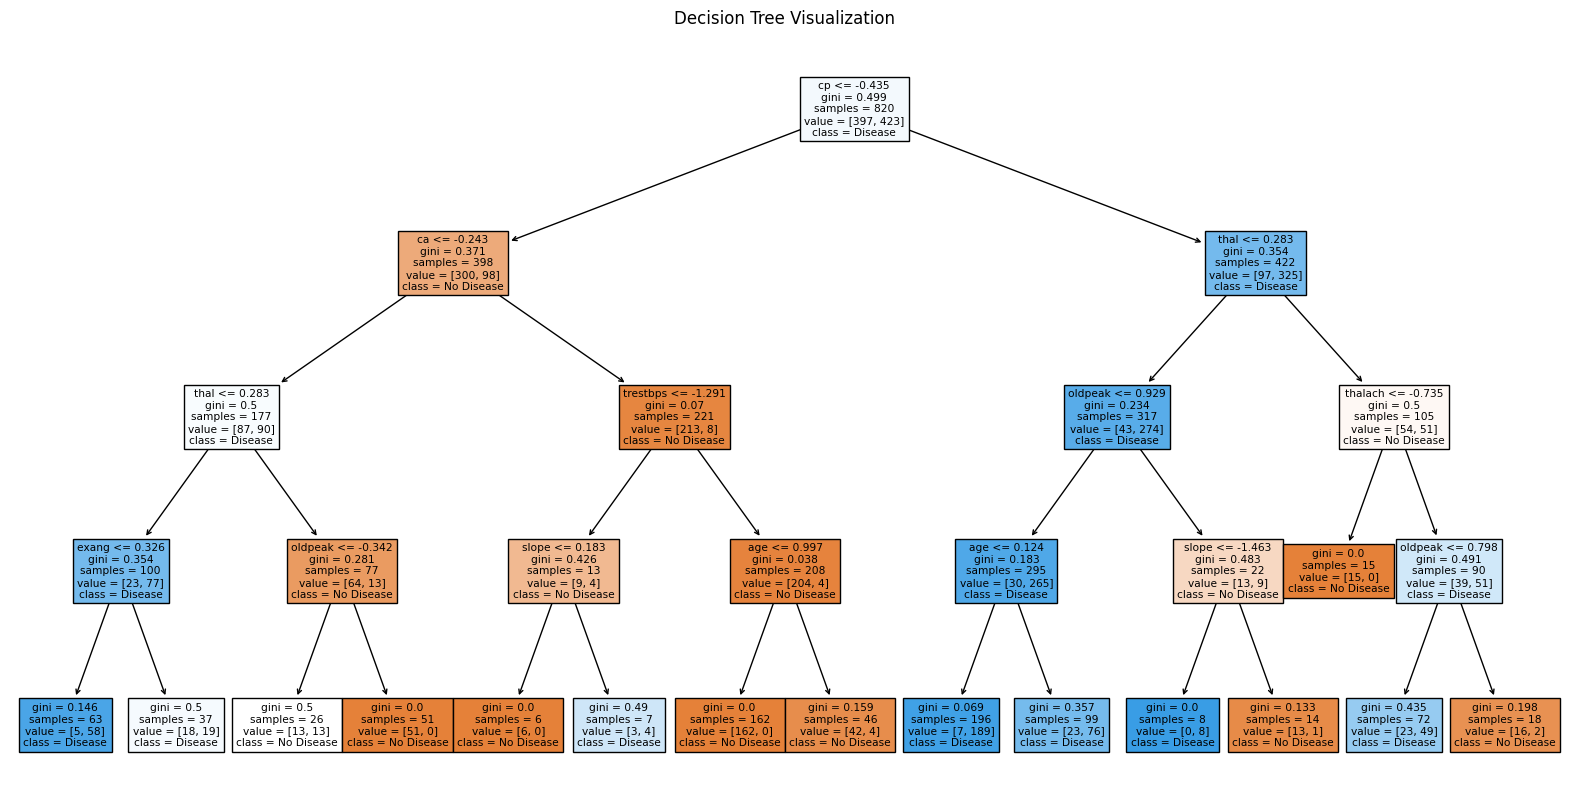

In [10]:
# Visualize Decision Tree (if needed)
plt.figure(figsize=(20,10))
tree.plot_tree(trained_models["Decision Tree"], feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

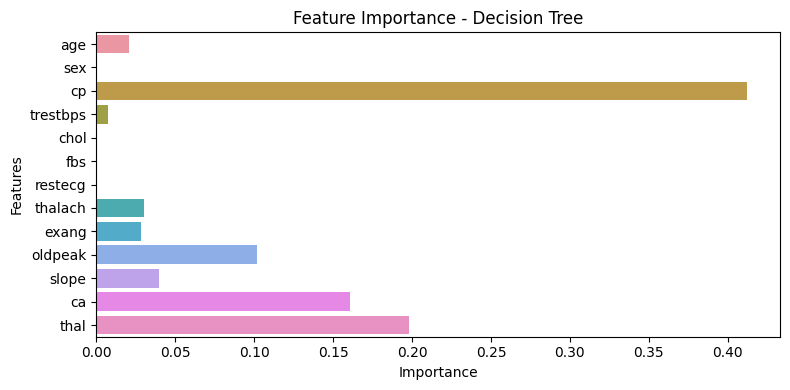

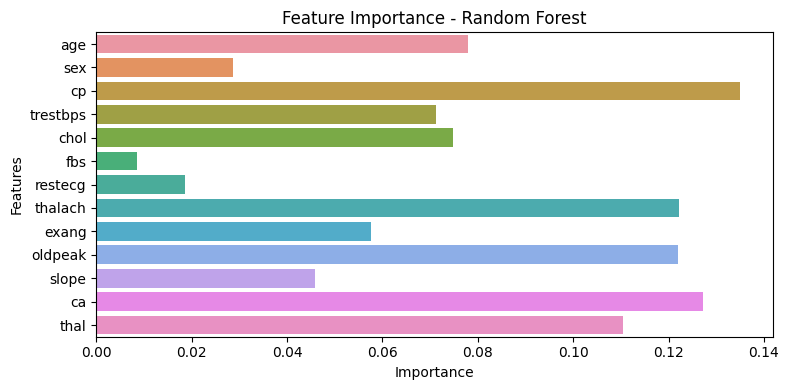

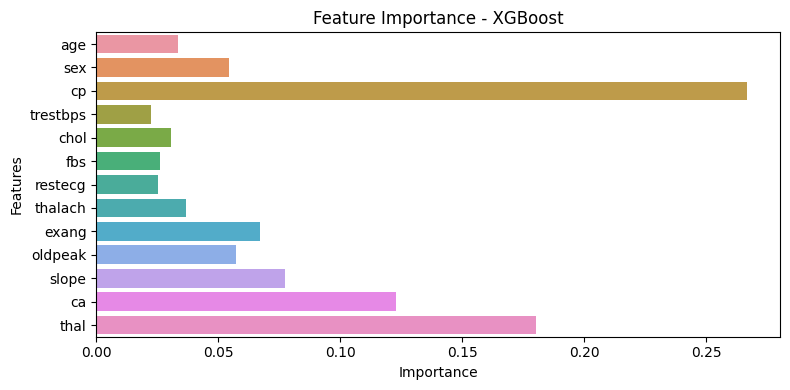

In [11]:
# 📊 Feature Importance Visualization for Decision Tree, Random Forest, and XGBoost

models_to_plot = {
    "Decision Tree": trained_models["Decision Tree"],
    "Random Forest": trained_models["Random Forest"],
    "XGBoost": trained_models["XGBoost"]
}

for name, model in models_to_plot.items():
    importances = model.feature_importances_
    features = X.columns
    plt.figure(figsize=(8, 4))
    sns.barplot(x=importances, y=features)
    plt.title(f"Feature Importance - {name}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()



Decision Tree Accuracy: 0.7951
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       102
           1       0.74      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.79      0.79       205
weighted avg       0.81      0.80      0.79       205



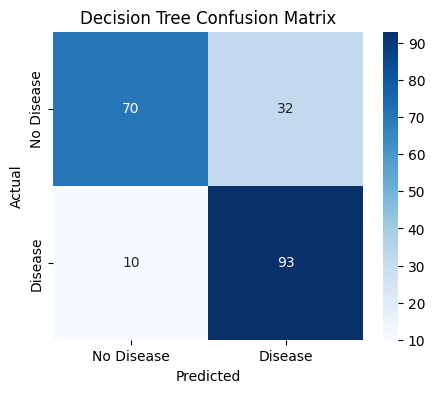


Random Forest Accuracy: 0.9854
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



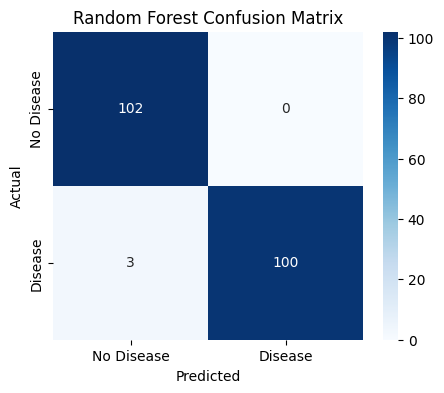


XGBoost Accuracy: 0.9854
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



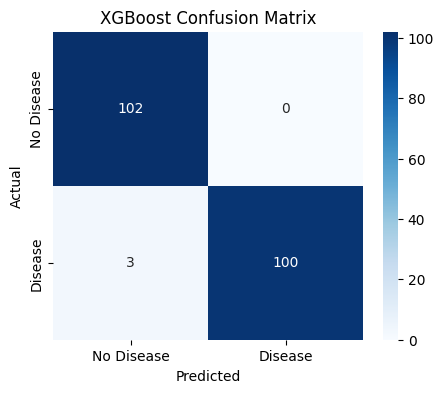


🏆 Best Model: Random Forest with Accuracy: 0.9854


In [12]:
# Evaluate and compare all models
best_model_name = None
best_accuracy = 0

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    # Track best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Print the best model
print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
